In [1]:
import sys

sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlresearch.utils import set_matplotlib_style
from recgame.environments import BaseEnvironment
from recgame.recourse import NFeatureRecourse
from recgame.utils import generate_synthetic_data

In [10]:
set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
rng = np.random.default_rng(RNG_SEED)
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = 10  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = 0.1  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 10  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

df, y, categorical = generate_synthetic_data(N_AGENTS, N_CONTINUOUS, N_CAT, RNG_SEED)

lr = LogisticRegression().fit(df, y)

In [11]:
def data_source_func(n_agents):
    X, _, _ = generate_synthetic_data(
        n_agents=n_agents,
        n_continuous=N_CONTINUOUS,
        n_categorical=N_CAT,
        random_state=rng,
    )
    return X

In [12]:
# Define the necessary components to run simulation
recourse = NFeatureRecourse(lr, n_features=2, categorical=categorical)
recourse.set_actions(df)
recourse.action_set_.ub = [2, 2]

environment = BaseEnvironment(
    X=df,
    recourse=recourse,
    data_source_func=data_source_func,
    threshold=N_LOANS,
    threshold_type="absolute",
    adaptation=ADAPTATION,
    behavior_function="continuous_flexible",
    growth_rate=NEW_AGENTS,
    growth_rate_type="absolute",
    random_state=RNG_SEED,
)

environment.simulate(50)

BaseEnvironment(X=         f_0       f_1
0   0.601572  0.153339
1   0.750150  0.813522
2  -0.150345  0.065940
3   0.542613  0.394586
4   0.494400  0.215652
..       ...       ...
95  1.074555  0.440160
96  0.372271  0.987148
97  0.130985  0.201758
98  0.714442  0.368465
99  0.498293  0.445519

[100 rows x 2 columns],
                adaptation=0.1,
                data_source_func=<function data_source_func at 0x7f470449caf0>,
                growth_rate=10, growth_rate_type='absolute', random_state=42,
                recourse=NFeatureRecourse(categorical=[],
                                          model=LogisticRegression(),
                                          n_features=2,
                                          threshold=0.6409789044875925),
                threshold=10)

<Axes: title={'center': 'Population scores over 51 time steps'}, xlabel='Step', ylabel='Score'>

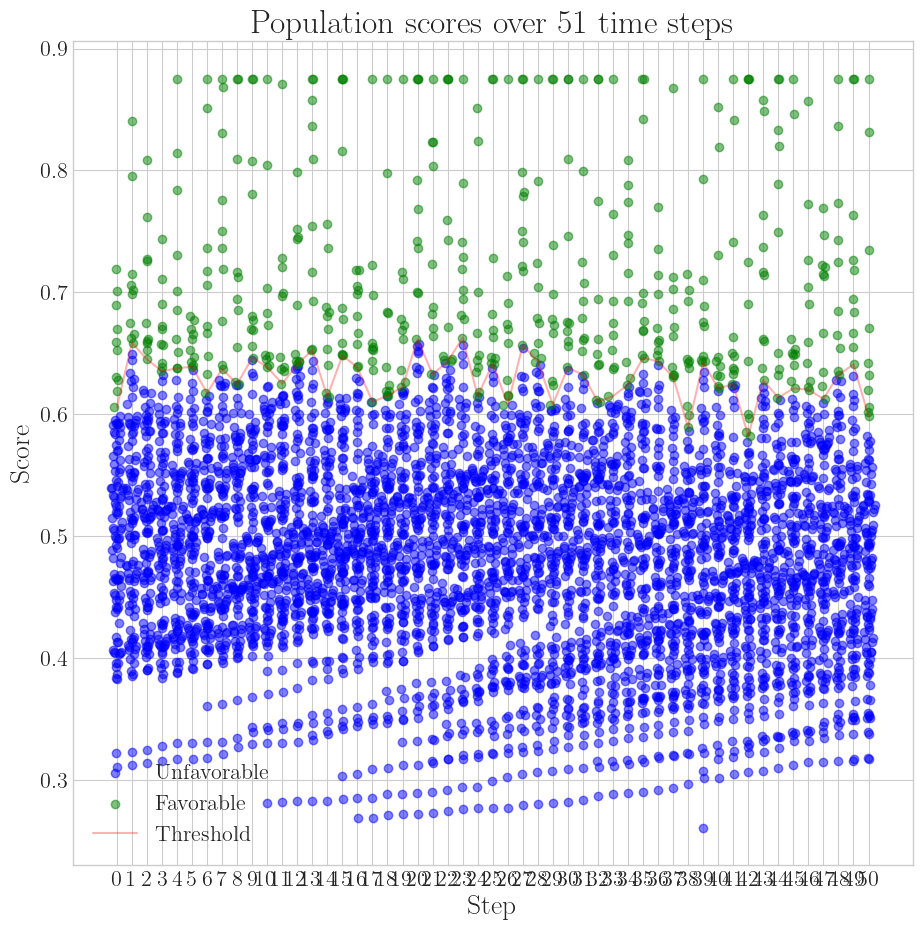

In [13]:
environment.plot.agent_scores()

<Axes: title={'center': 'Population at t=4'}, xlabel='f_0', ylabel='f_1'>

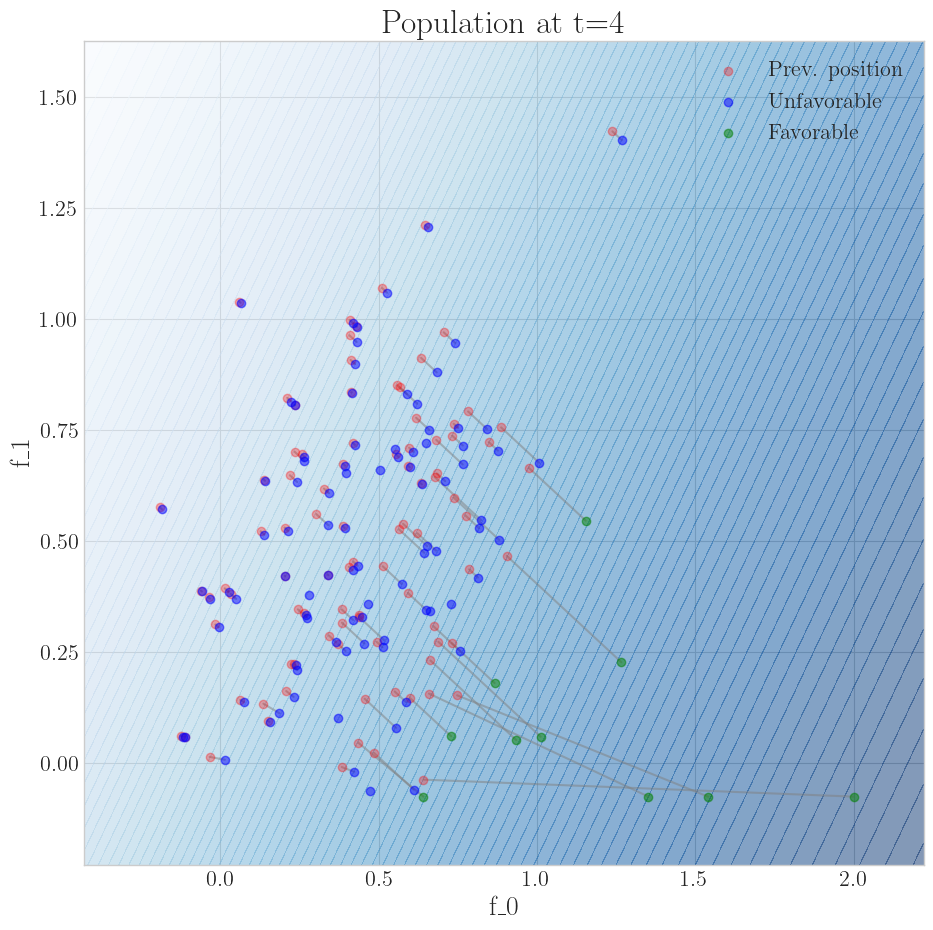

In [14]:
environment.plot.scatter(4)

,success_proba,success_rate
success_proba,1.000000,0.065539
success_rate,0.065539,1.000000


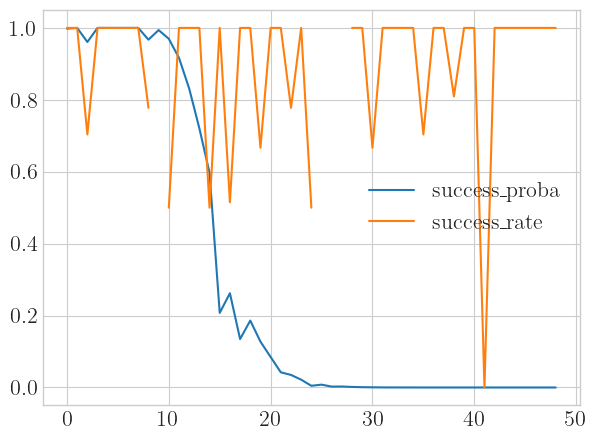

In [8]:
steps_info = environment.analysis.steps_info()
predictions = pd.concat(
    [
        steps_info.success_proba.iloc[:-1].reset_index(drop=True),
        steps_info.success_rate.iloc[1:].reset_index(drop=True),  # * -1,
    ],
    axis=1,
).astype(float)
((predictions - predictions.min()) / (predictions.max() - predictions.min())).iloc[
    :50
].plot.line()
predictions.corr()

In [9]:
steps_info

,n_adapted,n_candidates,favorable_outcomes,success_rate,threshold,threshold_drift,new_agents,new_agents_proba,moving_agent_proba,success_proba
1,90.0,3.0,10.0,1.000000,0.593534,-0.020123,10.0,0.12,2.073976e-02,9.981373e-01
2,90.0,7.0,10.0,1.000000,0.591324,-0.003723,10.0,0.17,1.869744e-04,9.999706e-01
3,90.0,6.0,10.0,1.000000,0.560423,-0.052257,10.0,0.27,2.091499e-03,9.608486e-01
4,90.0,9.0,10.0,0.777778,0.576015,0.027822,10.0,0.22,4.416540e-05,1.000000e+00
5,90.0,5.0,10.0,1.000000,0.552736,-0.040413,10.0,0.31,7.128014e-08,1.000000e+00
6,90.0,7.0,10.0,1.000000,0.561583,0.016004,10.0,0.27,1.155152e-40,1.000000e+00
7,90.0,4.0,10.0,1.000000,0.553416,-0.014543,10.0,0.30,6.086662e-08,1.000000e+00
8,90.0,5.0,10.0,1.000000,0.550501,-0.005267,10.0,0.31,3.117745e-11,1.000000e+00
9,90.0,4.0,10.0,1.000000,0.534073,-0.029841,10.0,0.38,5.360888e-03,9.673283e-01
10,90.0,6.0,10.0,0.833333,0.566378,0.060487,10.0,0.25,1.401260e-37,9.939534e-01
